# 0. Import Dependencies

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

# 1. Import Data

In [45]:
df1 = pd.read_csv('./data/Chicago_Crimes_2001_to_2004.csv', on_bad_lines = 'skip', low_memory=False)
df2 = pd.read_csv('./data/Chicago_Crimes_2005_to_2007.csv', on_bad_lines = 'skip', low_memory=False)
df3 = pd.read_csv('./data/Chicago_Crimes_2008_to_2011.csv', on_bad_lines = 'skip', low_memory=False)

In [46]:
df = pd.concat([df1,df2,df3]).drop(['Unnamed: 0'], axis=1)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,"(41.817229156, -87.637328162)"
2,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,"(41.691784636, -87.635115968)"


# 2. Data Visualization

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484568 entries, 0 to 2688709
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          object 
 17  Year                  float64
 18  Updated On            object 
 19  Latitude              object 
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(6), int64(2), object(1

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6484568.0,5.101298e+06,2.054924e+06,634.000000,3.345181e+06,5.326133e+06,6.880743e+06,1.082723e+07
Beat,6484568.0,1.208221e+03,7.065525e+02,111.000000,6.240000e+02,1.112000e+03,1.733000e+03,2.535000e+03
District,6484478.0,1.132404e+01,6.953385e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,5784358.0,2.255808e+01,1.378068e+01,1.000000,1.000000e+01,2.200000e+01,3.400000e+01,5.000000e+01
Community Area,5782517.0,3.782135e+01,2.159690e+01,0.000000,2.300000e+01,3.300000e+01,5.800000e+01,7.700000e+01
X Coordinate,6416078.0,1.164468e+06,1.729256e+04,0.000000,1.152947e+06,1.165894e+06,1.176316e+06,1.205119e+06
Year,6484568.0,2.006273e+03,3.112746e+00,41.789832,2.004000e+03,2.007000e+03,2.009000e+03,2.011000e+03
Longitude,6416077.0,-8.767198e+01,6.252628e-02,-91.686566,-8.771379e+01,-8.766652e+01,-8.762868e+01,-8.752453e+01


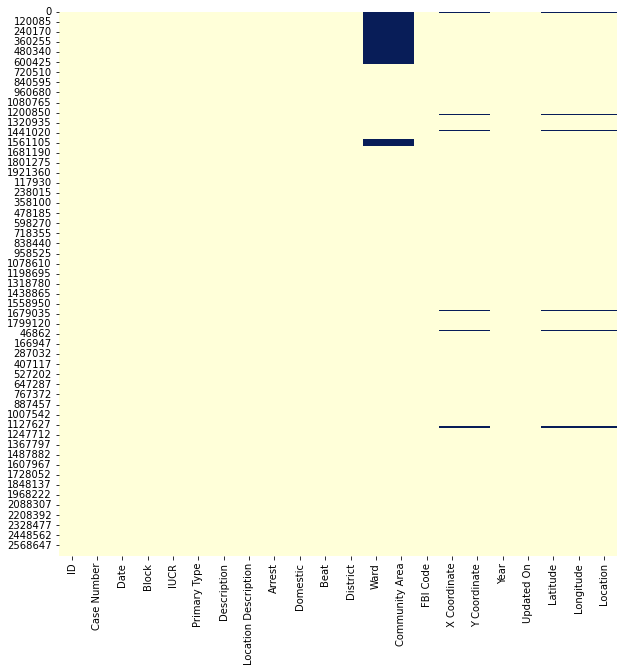

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False, cmap="YlGnBu")
plt.show()

In [50]:
df.drop(['ID', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [51]:
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y %I:%M:%S %p')
df = df.set_index("Date")

In [52]:
df.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [53]:
df['Primary Type'].value_counts()

THEFT                               1311046
BATTERY                             1179016
CRIMINAL DAMAGE                      767545
NARCOTICS                            750191
OTHER OFFENSE                        404048
ASSAULT                              390372
BURGLARY                             387561
MOTOR VEHICLE THEFT                  309410
ROBBERY                              243140
DECEPTIVE PRACTICE                   205436
CRIMINAL TRESPASS                    192454
PROSTITUTION                          78768
WEAPONS VIOLATION                     60196
PUBLIC PEACE VIOLATION                45426
OFFENSE INVOLVING CHILDREN            40043
SEX OFFENSE                           23822
CRIM SEXUAL ASSAULT                   23045
GAMBLING                              16594
LIQUOR LAW VIOLATION                  15560
ARSON                                 10880
INTERFERENCE WITH PUBLIC OFFICER       9515
KIDNAPPING                             6657
HOMICIDE                        

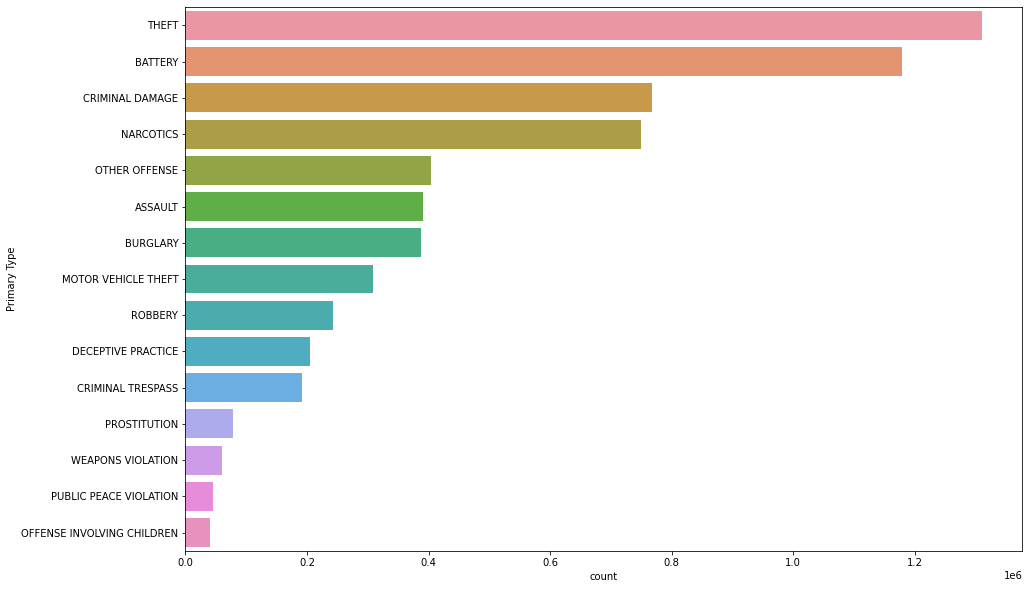

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(y= "Primary Type", data = df, order=df['Primary Type'].value_counts().iloc[:15].index)
plt.show()

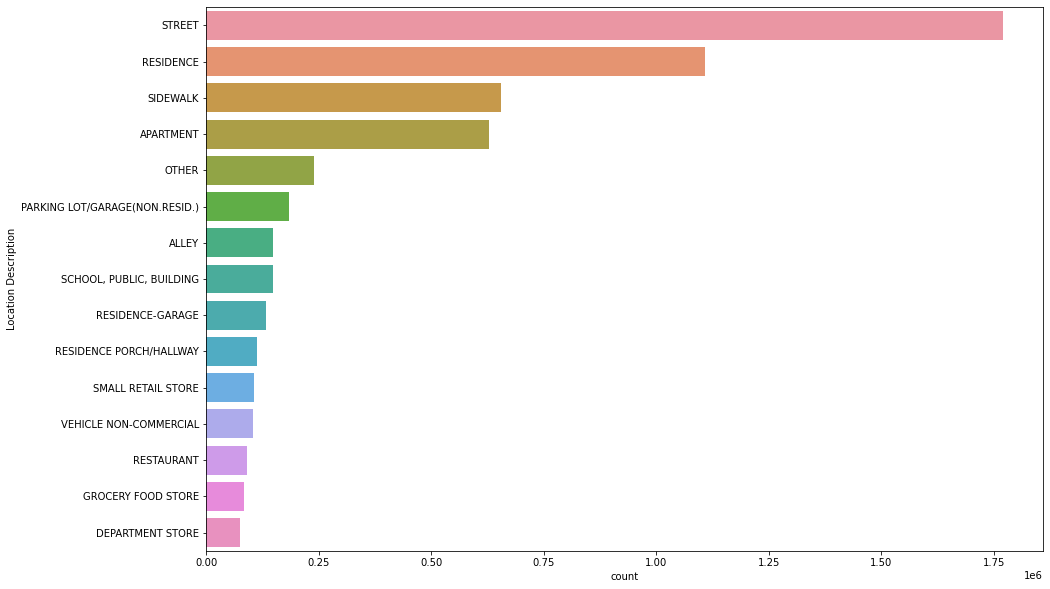

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(y= "Location Description", data = df, order=df['Location Description'].value_counts().iloc[:15].index)
plt.show()

In [56]:
df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
Freq: A-DEC, dtype: int64

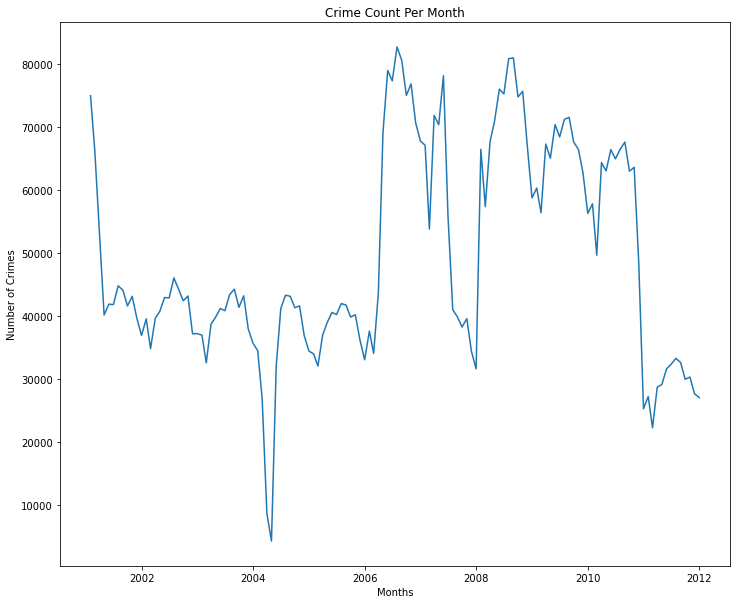

In [59]:
plt.figure(figsize=(12,10))

plt.plot(df.resample('M').size())
plt.title("Crime Count Per Month")
plt.xlabel("Months")
plt.ylabel("Number of Crimes")

plt.show()

# 3. Data Preparation

In [62]:
chicago_prophet = df.resample("M").size().reset_index()
chicago_prophet.columns = ['Date', 'Crime Count']

In [63]:
chicago_prophet_final = chicago_prophet.rename(columns={'Date':'ds', 'Crime Count':'y'})
chicago_prophet_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
127,2011-08-31,32616
128,2011-09-30,29945
129,2011-10-31,30305
130,2011-11-30,27653


# 4. Make Prediction

In [ ]:
m = Prophet()
m.fit(chicago_prophet_final)

In [68]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

c:\Users\Esra\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\Esra\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


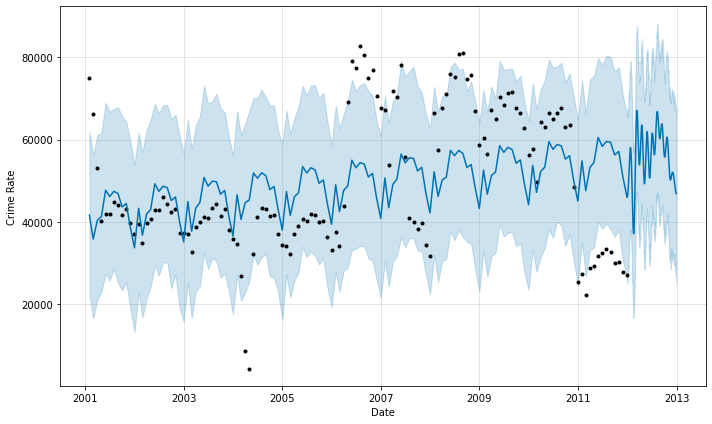

In [70]:
figure = m.plot(forecast, xlabel="Date", ylabel='Crime Rate')

c:\Users\Esra\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


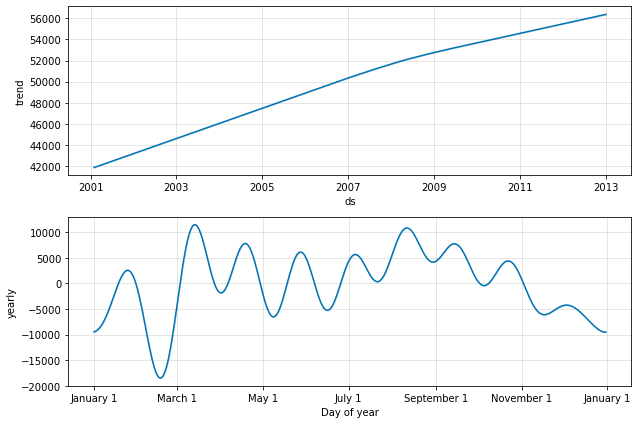

In [71]:
figure = m.plot_components(forecast)